<a href="https://colab.research.google.com/github/GregoryL12/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##For this Task:
Whether you chose 2 pre-approved datasets or 2 datasets from another source, or one of each:

Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

First choice: dataset 1
1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Second choice: dataset 2
1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

##Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Stroke Prediction Dataset

Source of data: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

 Brief description of data: According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [4]:
sr_df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
sr_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The target column is Stroke.

The column gender describes the gender of the patient and whether they are male or female.

This is a Classification problem.

This data has 11 features.

In [5]:
sr_df.shape

(5110, 12)

This data has 5110 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? I would drop the column id since it has no effect on the data and might mislead some predictions. Other than that there are no missing values so I should not have any challenges.

#Adult income dataset

Source of data: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Brief description of data: An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

In [6]:
ai_df = pd.read_csv('/content/adult.csv')
ai_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The target column is Income.

The column gender describes the gender of the adult and  whether they are male or female.

This is a Classification problem.

This data has 14 features.

In [7]:
ai_df.shape

(48842, 15)

This data has 48842 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? This data does not have any missing data and I can not forsee any other challenges.

#Cleaning and exploring the data

##Stroke Prediction Dataset

In [8]:
sr_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
sr_df.drop(columns='id', inplace=True)
sr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
print(f'There are {sr_df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [11]:
print(f'There are {sr_df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [12]:
sr_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

All the missing values are within the bmi column

In [13]:
bmi_median = sr_df['bmi'].median()
sr_df['bmi'].fillna(bmi_median, inplace=True)
sr_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

I have replaced all missing values in bmi column with the median value of the column.

In [14]:
sr_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

All the object type features have the correct amount of unique values.

In [15]:
sr_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


I am not a subject matter expert but 97.6 BMI seems unreasonable but is possible so I will not adjust it.

This a countplot showing the number of patients who have had a stroke to who have not had one.

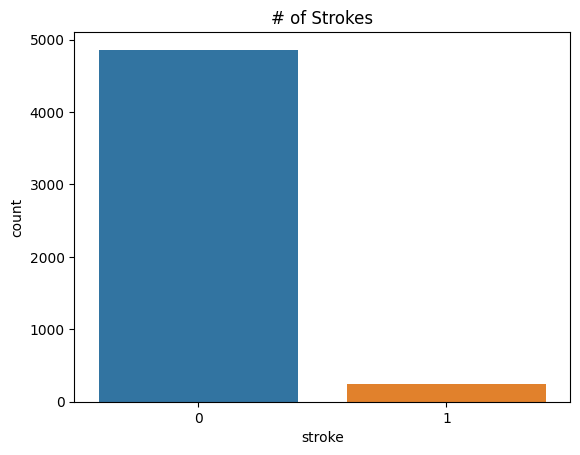

In [16]:
ax = sns.countplot(x=sr_df['stroke'])
ax.set_title('# of Strokes');

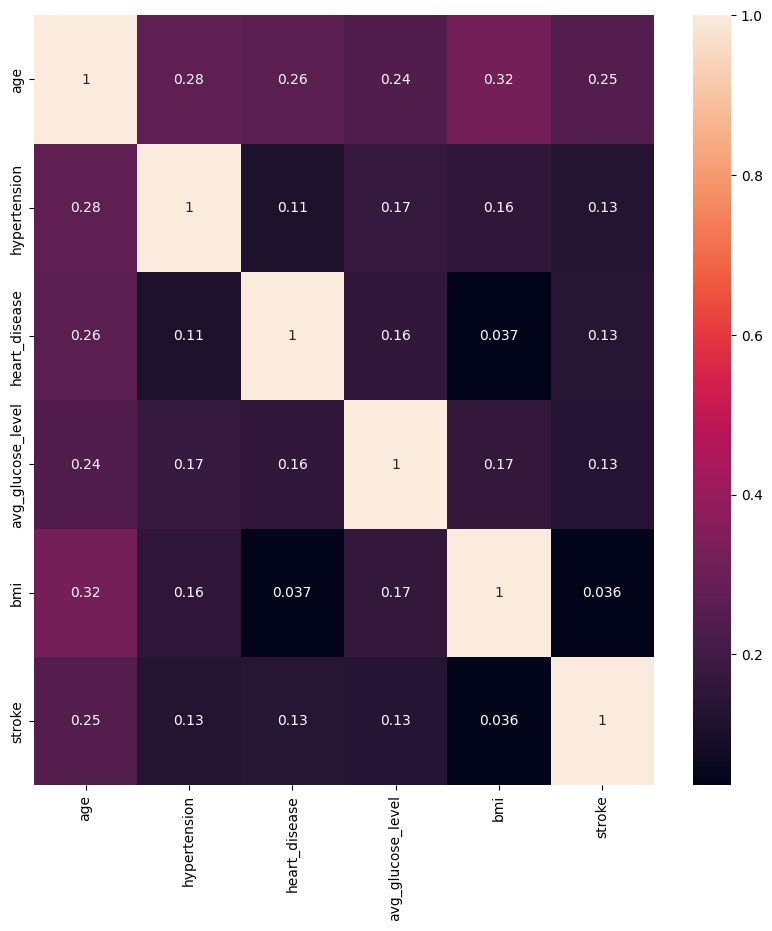

In [17]:
corr = sr_df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(corr, annot = True);

This is a heat map to show the corrrelation between the target and the variables.

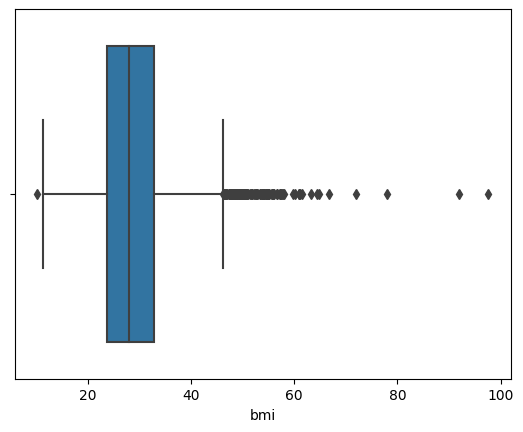

In [18]:
sns.boxplot(x=sr_df['bmi']);

This boxplot is visualizing the outliers in the bmi column.

##Adult income dataset

In [19]:
ai_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

I am not going to drop any columns.

In [20]:
print(f'There are {ai_df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [21]:
ai_df.drop_duplicates(inplace=True)
print(f'There are {ai_df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [22]:
print(f'There are {ai_df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [23]:
ai_df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [24]:
dtypes = ai_df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [25]:
for col in str_cols:
    print(f"- Column= {col}")
    print(ai_df[col].value_counts(dropna=False))
    print('\n\n')

- Column= workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- Column= education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



- Column= marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- Column= occupation
Prof-sp

In [26]:
ai_df['workclass'] = ai_df['workclass'].replace('?','Private')
ai_df['native-country'] = ai_df['native-country'].replace('?','United-States')
ai_df['occupation'] = ai_df['occupation'].replace('?','Did-not-respond')

I changed the ? in workclass and native-country to the most frquent value in their respective columns and then I changed the ? in occupation to Did-not-respond.

In [27]:
ai_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
ai_df['income'] = ai_df['income'].replace('<=50K','0')
ai_df['income'] = ai_df['income'].replace('>50K','1')

In [38]:
ai_df['income'] = ai_df['income'].astype(float)
ai_df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income             float64
dtype: object

In [33]:
ai_df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

I changed <=50K and >50K to 0 and 1 respectively to better be able to plot them and changed the type to float.

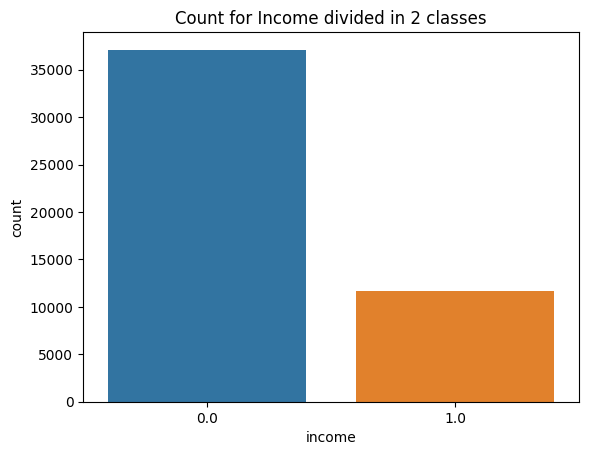

In [39]:
ax = sns.countplot(x=ai_df['income'])
ax.set_title('Count for Income divided in 2 classes');

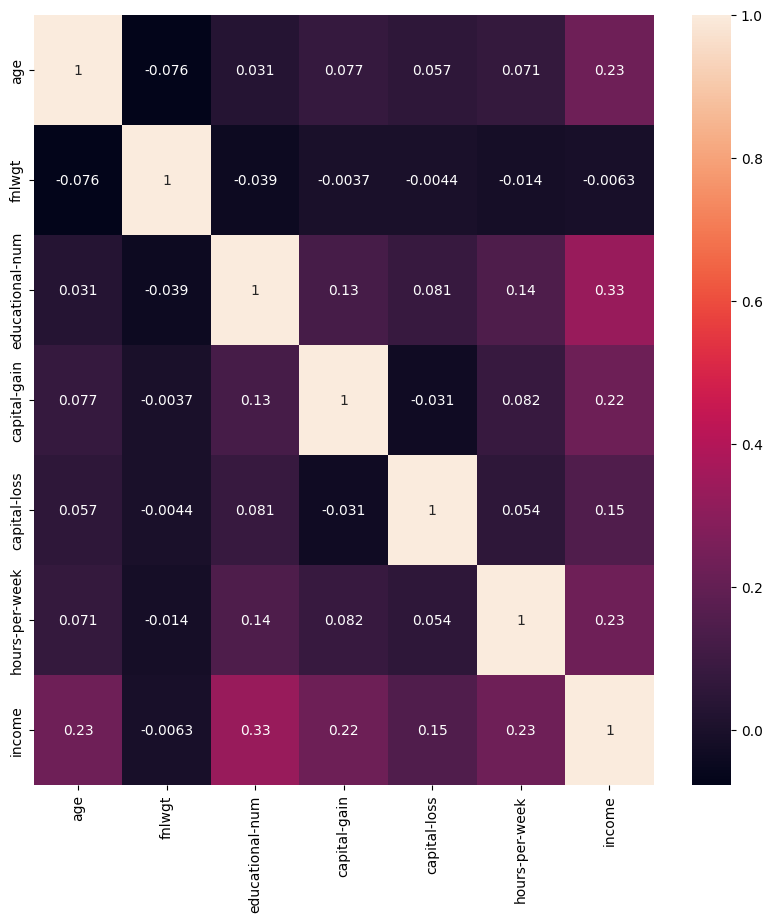

In [40]:
corr = ai_df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(corr, annot = True);

Income and it's correlation with the other features on the data.

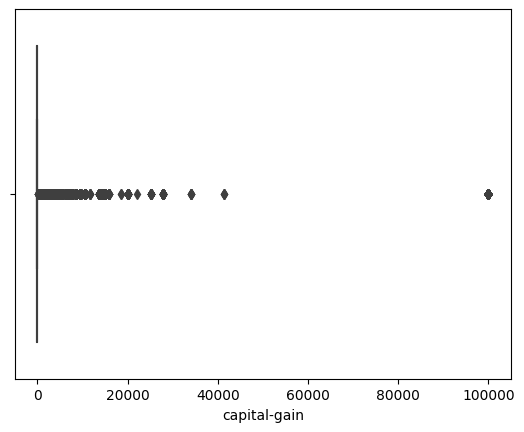

In [41]:
sns.boxplot(x=ai_df['capital-gain']);

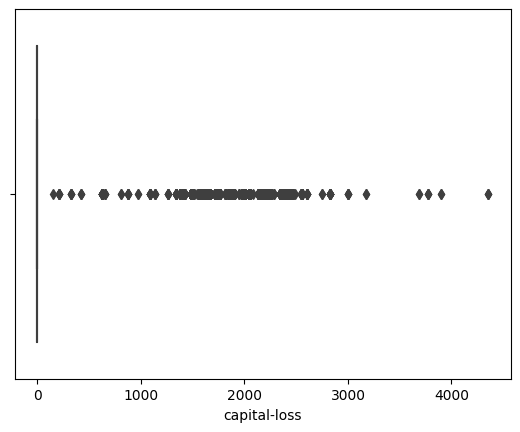

In [42]:
sns.boxplot(x=ai_df['capital-loss']);

These 2 boxplots showm the outliers in capital-gain and capital-loss columns.